# Resume Classification Using Naive Bayes

The data is in CSV format, with two features: Category, and Resume.

Category - Industry sector to which the resume belongs to, and

Resume - The complete CV (text) of the candidate.

Case

Automated resume categorization can speeden the candidate selection process. Such automation can really ease the tedious process of fair screening and shortlisting the right candidates and aid quick decision making. Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates. Finding suitable candidates for an open role from a database of 1000s of resumes can be a tough task

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Get the data

In [2]:
df=pd.read_csv("/content/UpdatedResumeDataSet.csv")
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


Preprocessing and Exploratory Data Analysis

display category of resumes

In [3]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [5]:
# Display the different categories in Resume
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
# Display distinct categories of resume and number of records
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

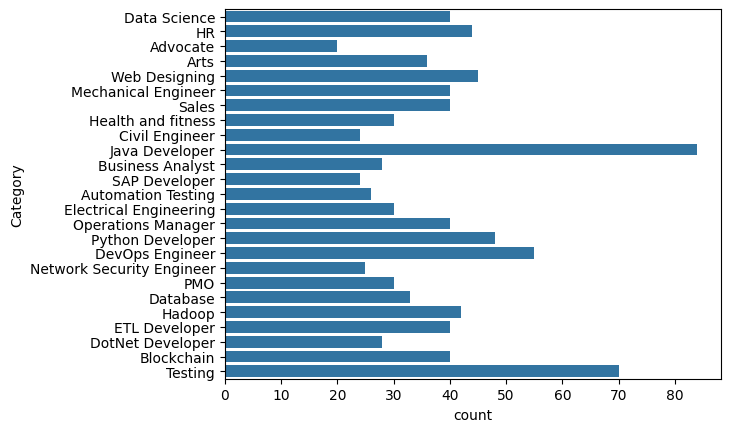

In [7]:
# Create the count plot
sns.countplot(y = df['Category'], data = df)

In [8]:
# Convert all characters to lowercase
def convert_lower(text):
  return text.lower()

In [9]:
df['Resume']=df['Resume'].apply(convert_lower)

In [10]:
#Check for lower case changes done
df['Resume'].head(10)

0    skills * programming languages: python (pandas...
1    education details \r\nmay 2013 to may 2017 b.e...
2    areas of interest deep learning, control syste...
3    skills â¢ r â¢ python â¢ sap hana â¢ table...
4    education details \r\n mca   ymcaust,  faridab...
5    skills c basics, iot, python, matlab, data sci...
6    skills â¢ python â¢ tableau â¢ data visuali...
7    education details \r\n b.tech   rayat and bahr...
8    personal skills â¢ ability to quickly grasp t...
9    expertise â data and quantitative analysis â...
Name: Resume, dtype: object

Cleaning Resume Text Data

Special Characters to be removed (URL, cc list, Hashtags # and Mentions @, punctuations and extra whitespaces)

In [11]:
import re
def cleanResume(resumeText):
  resumeText = re.sub(r'http\S+', '', resumeText,flags = re.MULTILINE) # remove URLs
  resumeText = re.sub('RT|cc', '', resumeText)  # remove RT and cc
  resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
  resumeText = re.sub('@\S+', '', resumeText)  # remove mentions
  resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', resumeText)  # remove punctuations
  resumeText = re.sub('â\S+', '', resumeText)  # remove â¢
  resumeText = re.sub('+', '', resumeText)  # remove 
  resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace

  return resumeText

In [12]:
 # apply the function defined above and save the
 df['cleaned_resume'] = df['Resume'].apply(cleanResume)

In [13]:
df.head(10)

,Category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...
5,Data Science,"skills c basics, iot, python, matlab, data sci...",skills c basics iot python matlab data science...
6,Data Science,skills â¢ python â¢ tableau â¢ data visuali...,skills python tableau data visualization r stu...
7,Data Science,education details \r\n b.tech rayat and bahr...,education details btech rayat and bahra instit...
8,Data Science,personal skills â¢ ability to quickly grasp t...,personal skills ability to quickly grasp techn...
9,Data Science,expertise â data and quantitative analysis â...,expertise data and quantitative analysis decis...


In [14]:
sent_lens = []
for i in df.cleaned_resume:
    length = len(i.split())
    sent_lens.append(length)

print(len(sent_lens))
print(max(sent_lens))

962
2014


In [15]:
# Check the difference btw old and new resume
df[['Resume', 'cleaned_resume']].head(10)

,Resume,cleaned_resume
0,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...
2,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...
5,"skills c basics, iot, python, matlab, data sci...",skills c basics iot python matlab data science...
6,skills â¢ python â¢ tableau â¢ data visuali...,skills python tableau data visualization r stu...
7,education details \r\n b.tech rayat and bahr...,education details btech rayat and bahra instit...
8,personal skills â¢ ability to quickly grasp t...,personal skills ability to quickly grasp techn...
9,expertise â data and quantitative analysis â...,expertise data and quantitative analysis decis...


Stopwords Removal

The stopwords, for example, and, the, was, and so forth etc. appear very frequently in the text and are not helpful in the predictive process. Therefore these are usually removed for text analytics and text classification purposes.

Tokenize the input words into individual tokens and store it in an array
Using nltk.corpus.stopwords, remove the stopwords

In [16]:
# List of stop words (nltk package to find the most common words)
stopword_list = nltk.corpus.stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
#Removing the stop words
from nltk.tokenize import word_tokenize

def remove_stopwords(text, is_lower_case=False):
    # splitting strings into tokens (list of words)
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [18]:
# apply function on cleaned resume to remove stopwords
df['cleaned_resume'] = df['cleaned_resume'].apply(remove_stopwords)

In [19]:
# Check Status
df[['Resume','cleaned_resume']].head()

,Resume,cleaned_resume
0,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 may 2017 uitrgpv da...
2,"areas of interest deep learning, control syste...",areas interest deep learning control system de...
3,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...


In [20]:
# most common words
from nltk.probability import FreqDist

word_token_array = []
for row in df['cleaned_resume']:
  for token in word_tokenize(row):
    word_token_array.append(token)

print(len(word_token_array))
fdist = FreqDist(word_token_array)
print(fdist)

df1 = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
df1.sort_values(by=['Frequency'],ascending=False).head(10)

311877
<FreqDist with 8022 samples and 311877 outcomes>


,Word,Frequency
84,exprience,3829
89,company,3536
520,project,3353
86,months,3283
90,description,3122
74,details,3096
75,data,2125
506,management,1989
108,team,1922
333,1,1847


<function matplotlib.pyplot.show(close=None, block=None)>

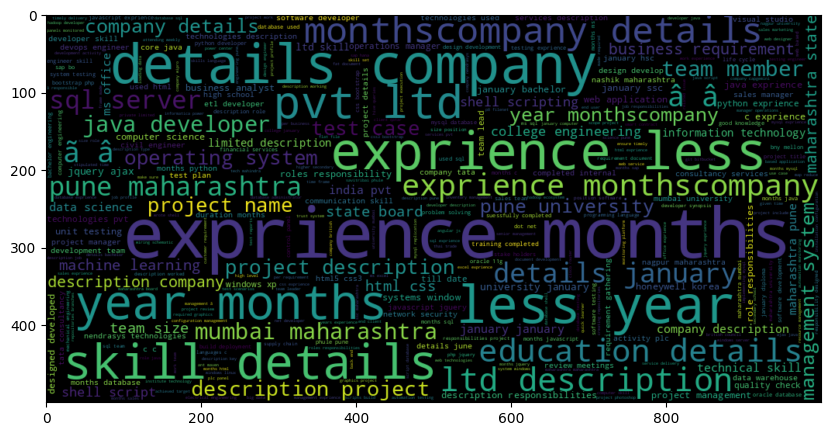

In [21]:
# YOUR CODE HERE to show the most common word using WordCloud
plt.figure(figsize=(10,10))
df_resume =  df[['cleaned_resume']]
resume_text = ' '.join(cleaned_resume for cleaned_resume in df_resume.cleaned_resume)
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
resume_words = WC.generate(resume_text)
plt.imshow(resume_words, interpolation='bilinear')
plt.show

Converting categorical variable "Category" to numerical feature and make different column i.e. "Target"

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Target'] = le.transform(df['Category'])
df

,Category,Resume,cleaned_resume,Target
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...,6
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 may 2017 uitrgpv da...,6
2,Data Science,"areas of interest deep learning, control syste...",areas interest deep learning control system de...,6
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...,6
...,...,...,...,...
957,Testing,computer skills: â¢ proficient in ms office (...,computer skills proficient ms office word basi...,23
958,Testing,â willingness to accept the challenges. â ...,willingness aept challenges positive thinking ...,23
959,Testing,"personal skills â¢ quick learner, â¢ eagerne...",personal skills quick learner eagerness learn ...,23
960,Testing,computer skills & software knowledge ms-power ...,computer skills software knowledge mspower poi...,23


Feature Extraction (Important Step)

important: Convert the text to feature vectors by applying tfidf vectorizer to the Label encoded category made above

TF-IDF will tokenize documents , learn the vocublary, inverse document frequency weighting and allow to encode new document

In [23]:
# tfidf vectorizer
tv = TfidfVectorizer(sublinear_tf=True,
    stop_words='english',
    max_features=1500)
#transformed train reviews
tfidf_resumes = tv.fit_transform(df['cleaned_resume'])
print('Tfidf_train:', tfidf_resumes.shape)

Tfidf_train: (962, 1500)


Use Naive Bayes Classifier

Split the data into train and test sets. Apply Naive Bayes Classifier and evaluate model predictions

use Vectorized features made above as X and Lebelled category as y

In [24]:
# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(tfidf_resumes, df['Target'], test_size = 0.2, random_state = 0)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(769, 1500)
(193, 1500)
(769,)
(193,)


In [26]:
# training the model
mnb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# fitting the NaiveBayes for tfidf features
mnb_tfidf = mnb.fit(X_train, y_train)

print('MultinomialNB for tf-idf :', mnb_tfidf)

MultinomialNB for tf-idf : MultinomialNB()


In [27]:
# predicting the model for tfidf features
mnb_tfidf_predict = mnb_tfidf.predict(X_test)
print('predictions for tf-idf :', mnb_tfidf_predict)

predictions for tf-idf : [20 14 15 17 15 14 10 14 15 23  6 23  4 11 13  4 19  8  8 15 12 11 17 22
 19 16  5  8  3 15 20 18 22  7 23 23 22 18  6 20 10 20 14  8 15 15  8 11
  4 22  1 24 14 15 22 23  8 15  3 17 18  3  0 15 15 15 16 21 13 18 12 23
 22 12 13 22  8  6 19 15 24 14  7  1 24 13 12 10  9  8 22 15 23 11  9 23
 11 15 23 13  4 17  2  5  6 10  0 19 20 10 22 10 15 10 15 15 22 15 14  6
  1  4  5  7  9 13 23  6 15  9 21 11  5  3 15 24 19 13  8  3 13 13 11 20
 16 23 21 24  7 21 20 15 22 19 15 23  9 15 15  6  2 20  7 11 23 24  8  3
 20  2 10 22 15  2 11 23  1 23  6  3  3 24 24 12  5 23 18 22 20 20  3  6
 15]


In [28]:
# accuracy score for tf-idf
mnb_tfidf_score = accuracy_score(y_test, mnb_tfidf_predict)
print("mnb_tfidf_score :", mnb_tfidf_score)

mnb_tfidf_score : 0.9378238341968912


# Create Gradio based web interface to test and display the model predictions

In [29]:
!pip -q install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s 

In [31]:
import gradio

In [32]:
# Function for preprocessing of text

def preprocess_text(text):
    text = cleanResume(text)
    return text

In [33]:
#pd.concat([df['Category'],df['Target']]).unique()
Target_Category = df[['Category', 'Target']].drop_duplicates()
print(Target_Category)

                      Category  Target
0                 Data Science       6
40                          HR      12
84                    Advocate       0
104                       Arts       1
140              Web Designing      24
185        Mechanical Engineer      16
225                      Sales      22
265         Health and fitness      14
295             Civil Engineer       5
319             Java Developer      15
403           Business Analyst       4
431              SAP Developer      21
455         Automation Testing       2
481     Electrical Engineering      11
511         Operations Manager      18
551           Python Developer      20
599            DevOps Engineer       8
654  Network Security Engineer      17
679                        PMO      19
709                   Database       7
742                     Hadoop      13
784              ETL Developer      10
824           DotNet Developer       9
852                 Blockchain       3
892                    Te

In [34]:
Target_Category[Target_Category['Target']==21]['Category'].to_list()

['SAP Developer']

In [35]:
Target_Category[Target_Category['Category']=='Electrical Engineering']['Target'].to_list()

[11]

In [36]:
# Function to predict label for a review

def predict_review_label(text, vectorizer_method):

    processed_text = preprocess_text(text)
    review = tv.transform([processed_text])
    pred = mnb_tfidf.predict(review)

    return Target_Category[Target_Category['Target']==pred[0]]['Category'].to_list()

In [37]:
# Testing a review
predict_review_label("I am a Mechanical companies with 13 years of experience", 'TFIDFVectorizer')

['Mechanical Engineer']

In [38]:
# Dropdown choices for Gradio
#in_vectorizer_dropdown = gradio.inputs.Dropdown(['TFIDFVectorizer'], type="value", default=None, label='Choose a Method to Vectorize')
in_vectorizer_dropdown = gradio.Dropdown(["TFIDFVectorizer"], label="Choose a Method to Vectorize")

In [39]:
# Input from user in Gradio
# in_review = gradio.inputs.Textbox(lines=2, placeholder=None, default="resume", label='Enter the resume Text')
in_review = gradio.components.Textbox(lines=2, placeholder=None,label='Enter the resume Text')

In [40]:
# Output prediction
out_label = gradio.components.Textbox(type="text", label='Predicted Resume Category')

In [41]:
# Gradio interface to generate UI link

iface = gradio.Interface(fn = predict_review_label,
                         inputs = [in_review, in_vectorizer_dropdown],
                         outputs = [out_label])

iface.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://283ce9c90205f865e9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
